In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels.tsa.stattools

In [2]:
from notebookutils import root_dir, corr_plot; root_dir()

now in dir:  /Users/jonas/Documents/bayesianfactormodel


In [3]:
from model.utils import read_party_keys, party_name_from_key
from model.distributionplotter import DistributionPlotter
from model.traceplotter import TracePlotter
from model.parameterframe import ParameterFrame
from model.parameters import Parameters
from model.plotter import Plotter

In [4]:
beta_trace = pd.read_pickle("data//estimation_beta_trace_df.pkl")

In [5]:
beta = np.array(beta_trace['beta_13;0'][2000:])

In [6]:
acf = statsmodels.tsa.stattools.acf(beta, nlags=500)

In [7]:
from matplotlib import pyplot as plt

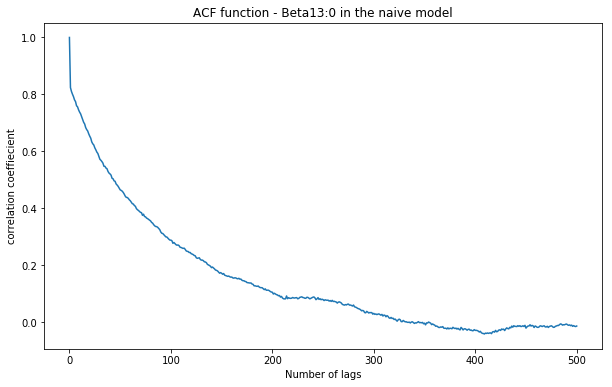

In [8]:
f, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(acf)
ax1.set_title('ACF function - Beta13:0 in the naive model')
ax1.set_xlabel('Number of lags')
ax1.set_ylabel('correlation coeffiecient')
f.savefig('figs_extra//acf_naive.png')

In [9]:
ess = len(beta)/(1+2*np.sum(acf))

In [10]:
ess

53.600614231231035

## Probit - version

In [11]:
tau_trace = pd.read_hdf("data//probit_v2_tau_trace_df.hdf")

In [12]:
tau = np.array(tau_trace['tau_11;4'][20000:])

In [13]:
acf_2 = statsmodels.tsa.stattools.acf(tau, nlags=1000)

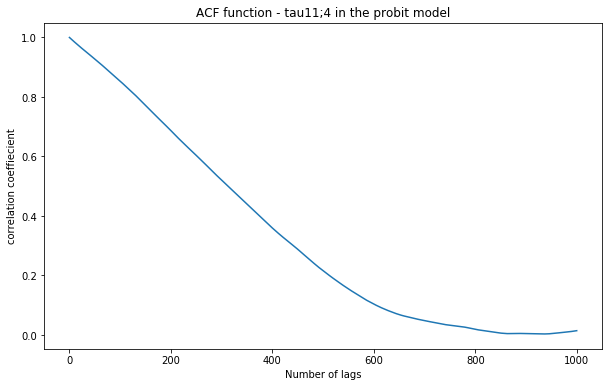

In [14]:
f, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(acf_2)
ax1.set_title('ACF function - tau11;4 in the probit model')
ax1.set_xlabel('Number of lags')
ax1.set_ylabel('correlation coeffiecient')
f.savefig('figs_extra//acf_probit.png')

In [15]:
ess_2 = len(tau)/(1+2*np.sum(acf_2))

In [16]:
ess_2

30.177669144464957